# FAKE PROFILE DETECTION USING DNN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data.csv")

In [ ]:
df.head()

,Unnamed: 0,statuses_count,followers_count,friends_count,favourites_count,listed_count,utc_offset,created_at_year,lang_code,label
0,0,20370,5470,2385,145,52,3600,2007,1,0
1,1,3131,506,381,9,40,3600,2007,0,0
2,2,4024,264,87,323,16,3600,2007,0,0
3,3,40586,640,622,1118,32,3600,2007,0,0
4,4,2016,62,64,13,0,3600,2007,1,0


In [ ]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'utc_offset', 'created_at_year',
       'lang_code', 'label'],
      dtype='object')

In [ ]:
df=df.sample(frac=1.0, replace=False,random_state=42).reset_index(drop=True)

In [ ]:
df.shape

(2818, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818 entries, 0 to 2817
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   statuses_count    2818 non-null   int64
 1   followers_count   2818 non-null   int64
 2   friends_count     2818 non-null   int64
 3   favourites_count  2818 non-null   int64
 4   listed_count      2818 non-null   int64
 5   utc_offset        2818 non-null   int64
 6   created_at_year   2818 non-null   int64
 7   lang_code         2818 non-null   int64
 8   label             2818 non-null   int64
dtypes: int64(9)
memory usage: 198.3 KB


In [ ]:
X=df.drop("label",axis=1)
y=df["label"]

In [ ]:
df.isnull().sum().sum()

0

### Train Test Split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

### Data Preprocessing

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train.shape

(2254, 8)

In [ ]:
y_train.shape

(2254,)

### Model Creation

In [ ]:
tf.random.set_seed(15)
model=Sequential()
model.add(Dense(1024,input_shape=X_train.shape[1:],activation="relu"))
model.add(Dropout(0.7))
model.add(BatchNormalization())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.6))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=64,epochs=50,validation_data=(X_test,y_test),workers=-1,use_multiprocessing=True)

Epoch 1/50
36/36 [==============================] - 4s 20ms/step - loss: 0.2440 - accuracy: 0.9215 - val_loss: 0.3224 - val_accuracy: 0.9805
Epoch 2/50
36/36 [==============================] - 0s 11ms/step - loss: 0.0874 - accuracy: 0.9858 - val_loss: 0.2382 - val_accuracy: 0.9965
Epoch 3/50
36/36 [==============================] - 0s 12ms/step - loss: 0.0580 - accuracy: 0.9925 - val_loss: 0.1771 - val_accuracy: 0.9965
Epoch 4/50
36/36 [==============================] - 0s 10ms/step - loss: 0.0487 - accuracy: 0.9947 - val_loss: 0.1282 - val_accuracy: 0.9965
Epoch 5/50
36/36 [==============================] - 0s 10ms/step - loss: 0.0381 - accuracy: 0.9960 - val_loss: 0.0948 - val_accuracy: 0.9965
Epoch 6/50
36/36 [==============================] - 0s 11ms/step - loss: 0.0328 - accuracy: 0.9951 - val_loss: 0.0754 - val_accuracy: 0.9965
Epoch 7/50
36/36 [==============================] - 0s 11ms/step - loss: 0.0264 - accuracy: 0.9956 - val_loss: 0.0460 - val_accuracy: 0.9965
Epoch 8/50
36

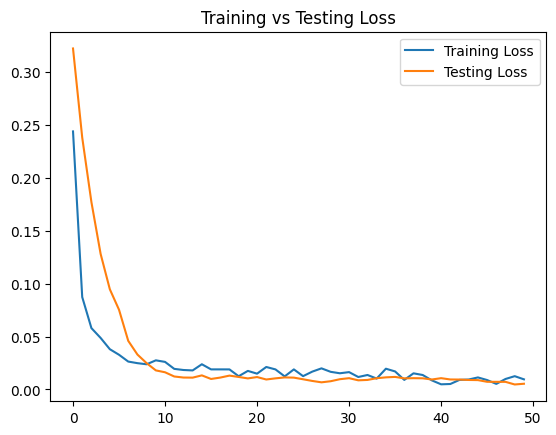

In [ ]:
epochs=range(len(history.history["loss"]))
plt.plot(epochs,history.history["loss"])
plt.plot(epochs,history.history["val_loss"])
plt.legend(["Training Loss","Testing Loss"])
plt.title("Training vs Testing Loss")
plt.show()

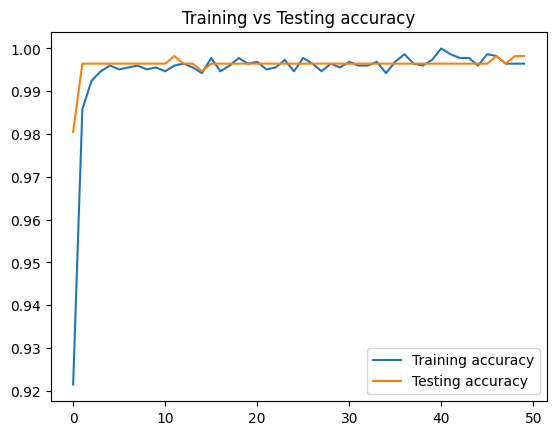

In [ ]:
epochs=range(len(history.history["loss"]))
plt.plot(epochs,history.history["accuracy"])
plt.plot(epochs,history.history["val_accuracy"])
plt.legend(["Training accuracy","Testing accuracy"])
plt.title("Training vs Testing accuracy")
plt.show()

In [ ]:
print("Training accuracy :",max(history.history["accuracy"])*100,end=" ")
print("Testing accuracy :",max(history.history["val_accuracy"])*100)

Training accuracy : 100.0 Testing accuracy : 99.82269406318665


In [ ]:
y_pred=model.predict(X_test)

18/18 [==============================] - 0s 3ms/step


In [ ]:
y_pred=np.array(list(map(lambda x: 0 if x<0.5 else 1, y_pred)))

In [ ]:
pd.Series(y_pred).value_counts()

0    291
1    273
dtype: int64

In [ ]:
y_test.value_counts()

0    290
1    274
Name: label, dtype: int64

<Axes: xlabel='label'>

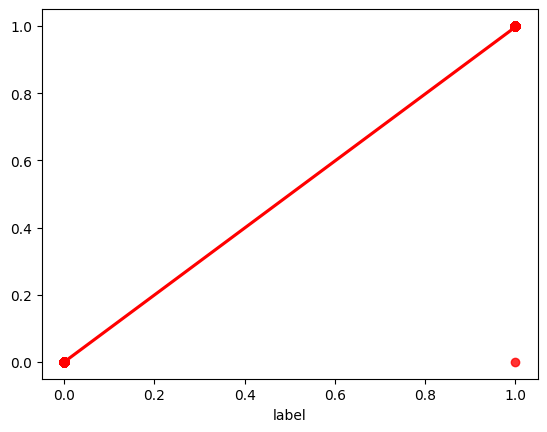

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      1.00      1.00       274

    accuracy                           1.00       564
   macro avg       1.00      1.00      1.00       564
weighted avg       1.00      1.00      1.00       564



Confusion matrix
[[290   0]
 [  1 273]]


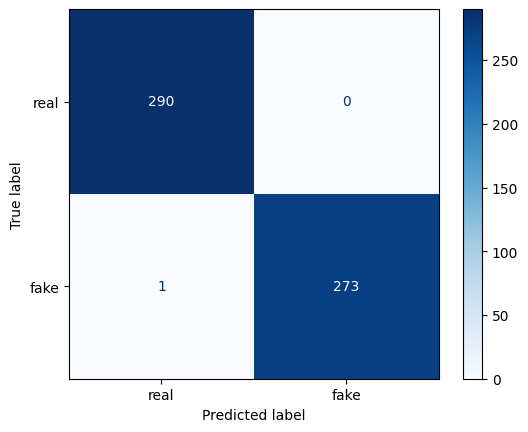

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix')
print(cm)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["real","fake"]).plot(cmap=plt.cm.Blues)
plt.grid(False)

In [ ]:
# !pip install gradio

In [ ]:
# import gradio as gr

# def predict(statuses_count,followers_count,friends_count,favourites_count,listed_count,utc_offset,created_at_year,lang_code):
#   input_list = [statuses_count, followers_count, friends_count, favourites_count, listed_count, utc_offset, created_at_year, lang_code]
#   input=scaler.transform(np.array(input_list).reshape(1,8))
#   pred=model.predict(input)
#   if pred>=0.5:
#     return "fake"
#   else:
#     return "real"


# gr.Interface(fn=predict, inputs=["text"]*8, outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>